# How to visualize meshes with overlay? 

In [1]:
import pyvista as pv

import polpo.preprocessing.dict as ppdict
from polpo.preprocessing import Map
from polpo.preprocessing.load.pregnancy.pilot import (
    HippocampalSubfieldsSegmentationsLoader,
    RegisteredMeshesLoader,
)
from polpo.preprocessing.mesh.conversion import PvFromData
from polpo.preprocessing.mesh.io import PvReader
from polpo.preprocessing.mesh.transform import MeshCenterer, MeshScaler
from polpo.preprocessing.mri import MeshExtractorFromSegmentedImage

[KeOps] Warning : cuda was detected, but driver API could not be initialized. Switching to cpu only.


In [2]:
STATIC_VIZ = True

if STATIC_VIZ:
    pv.set_jupyter_backend("static")

Following [How to get a mesh from an MRI image?](./mri2mesh.ipynb), we download a segmented MRI and get a mesh out of it.

In [3]:
SESSION_ID = 2

In [4]:
img2mesh_pipe = MeshExtractorFromSegmentedImage(encoding="ashs") + PvFromData()

pipe = (
    HippocampalSubfieldsSegmentationsLoader(
        subset=[SESSION_ID],
        as_image=True,
    )
    + ppdict.ExtractUniqueKey()
    + img2mesh_pipe
)

raw_mesh = pipe()

INFO: Data has already been downloaded... using cached file ('/home/luisfpereira/.herbrain/data/pregnancy/derivatives/segmentations').


We also load a registered version of the same mesh (NB: there's more registrations at [figshare](https://figshare.com/articles/dataset/pregnancy-data/28339535)).

In [5]:
loader = (
    RegisteredMeshesLoader(
        subset=[SESSION_ID],
        method="elastic",
        version=1,
    )
    + ppdict.ExtractUniqueKey()
    + PvReader()
)

registered_mesh = loader()

INFO: Data has already been downloaded... using cached file ('/home/luisfpereira/.herbrain/data/pregnancy/derivatives/elastic_1').


The registered mesh was preprocessed before registration. Let's apply the same preprocessing in order to have an overlayable representation.

In [6]:
processing_pipe = Map([MeshCenterer(), MeshScaler()], force_iter=True)

raw_mesh = processing_pipe(raw_mesh)

Visualization.

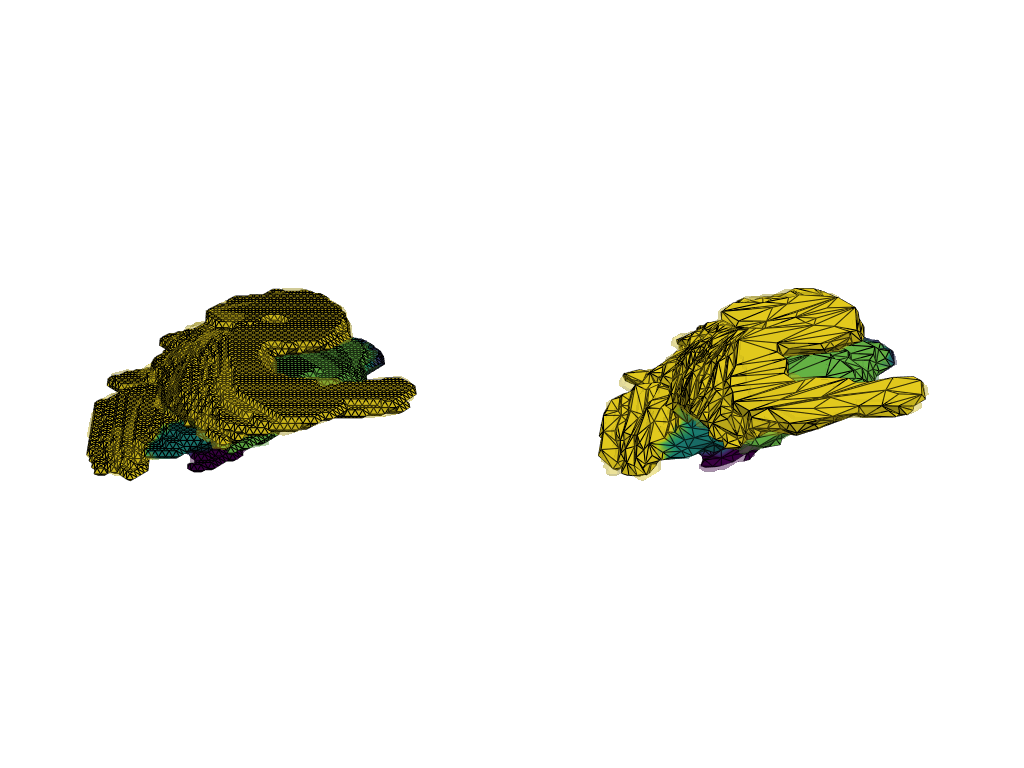

In [7]:
pl = pv.Plotter(shape=(1, 2), border=False)

pl.subplot(0, 0)
pl.add_mesh(raw_mesh, show_edges=True)
pl.add_mesh(registered_mesh, opacity=0.25)
pl.remove_scalar_bar()

pl.subplot(0, 1)
pl.add_mesh(registered_mesh, show_edges=True)
pl.add_mesh(raw_mesh, opacity=0.25)
pl.remove_scalar_bar()

pl.link_views()

pl.show()

Notice the meshes fully overlap even though they have a very different combinatorial structure.

In [8]:
(
    raw_mesh.faces.shape[0] // 3,
    registered_mesh.faces.shape[0] // 3,
)

(27680, 6032)